In [1]:
import numpy as np
import matplotlib.pyplot as plt

import alderaan.io as io
from alderaan.constants import *

In [5]:
PRIMARY_DIR  = '/Users/research/projects/alderaan/'
CSV_FILE = PRIMARY_DIR + "Catalogs/cumulative_koi_catalog.csv"

In [6]:
# Read in the data from csv file
print('Reading in data from csv file')

# read in a csv file containing info on targets
csv_keys, csv_values = io.read_csv_file(CSV_FILE)

# put these csv data into a dictionary
target_dict = {}
for k in csv_keys: 
    target_dict[k] = io.get_csv_data(k, csv_keys, csv_values)

Reading in data from csv file


In [7]:
target_dict.keys()

dict_keys(['planet_name', 'disposition', 'koi_id', 'kic_id', 'npl', 'kep_mag', 'mstar', 'mstar_err1', 'mstar_err2', 'rstar', 'rstar_err1', 'rstar_err2', 'logrho', 'logrho_err1', 'logrho_err2', 'Teff', 'Teff_err1', 'Teff_err2', 'FeH', 'FeH_err1', 'FeH_err2', 'logg', 'logg_err1', 'logg_err2', 'limbdark_1', 'limbdark_2', 'period', 'period_err1', 'period_err2', 'epoch', 'epoch_err1', 'epoch_err2', 'prad', 'prad_err1', 'prad_err2', 'impact', 'impact_err1', 'impact_err2', 'depth', 'depth_err1', 'depth_err2', 'duration', 'duration_err1', 'duration_err2', 'ror', 'ror_err1', 'ror_err2', 'dor', 'dor_err1', 'dor_err2', 'snr', 'num_transits'])

In [14]:
# only use each target star once
keep = np.zeros(len(target_dict["planet_name"]), dtype="bool")

for i, pname in enumerate(target_dict["planet_name"]):
    if pname[-2:] == "01":
        keep[i] = True
        
        
for k in target_dict.keys():
    target_dict[k] = np.array(target_dict[k])[keep]

In [20]:
logrho = np.array(target_dict["logrho"], dtype="float")
logrho_err1 = np.array(target_dict["logrho_err1"], dtype="float")
logrho_err2 = np.array(target_dict["logrho_err2"], dtype="float")

bad = np.isnan(logrho) + np.isnan(logrho_err1) + np.isnan(logrho_err2)

logrho = logrho[~bad]
logrho_err1 = logrho_err1[~bad]
logrho_err2 = logrho_err2[~bad]

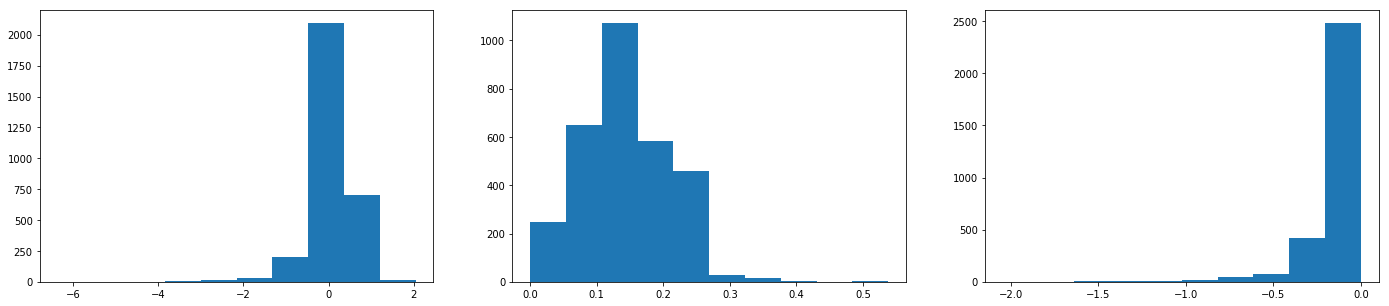

In [22]:
fig, ax = plt.subplots(1,3, figsize=(24,5))

ax[0].hist(logrho)
ax[1].hist(logrho_err1)
ax[2].hist(logrho_err2)

plt.show()

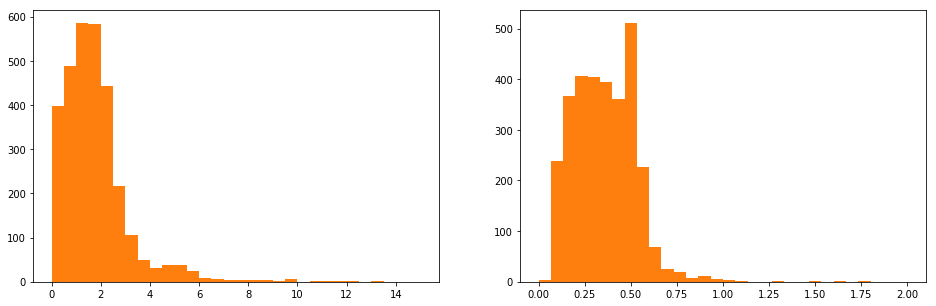

In [34]:
rho = 10**logrho
rho_err1 = 10**(logrho+logrho_err1) - rho
rho_err2 = 10**(logrho+logrho_err2) - rho

rho_err = np.sqrt(rho_err1**2 + rho_err2**2)/np.sqrt(2)

fig, ax = plt.subplots(1,2, figsize=(16,5))


ax[0].hist(rho, bins=np.linspace(0,15,31), color="C1")
ax[1].hist(rho_err/rho, bins=np.linspace(0,2,31), color="C1")

plt.show()

In [40]:
f100 = np.sum(rho_err/rho < 1)/len(rho)
f30 = np.sum(rho_err/rho < 0.3)/len(rho)
f10 = np.sum(rho_err/rho < 0.1)/len(rho)
f3 = np.sum(rho_err/rho < 0.03)/len(rho)
f1 = np.sum(rho_err/rho < 0.01)/len(rho)

print("fraction of targets with relative error...")
print("   < 1.00:  {0:.4f}".format(f100))
print("   < 0.30:  {0:.4f}".format(f30))
print("   < 0.10:  {0:.4f}".format(f10))
print("   < 0.03:  {0:.4f}".format(f3))
print("   < 0.01:  {0:.4f}".format(f1))

fraction of targets with relative error...
   < 1.00:  0.9974
   < 0.30:  0.4020
   < 0.10:  0.0108
   < 0.03:  0.0003
   < 0.01:  0.0003


In [63]:
# rho_circ/rho_star
def g(ecc, omega):
    return ((1 + ecc*np.sin(omega))/np.sqrt(1-ecc**2))**3

g(0.9,pi/2)

82.81907992727282